
# Sales Data Analysis

This notebook presents a clean and insightful analysis of the sales data using appropriate charts to derive key business insights. Each visualization is accompanied by contextual explanations and a final summary of takeaways.


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\saiya\Downloads\sales data\sales_data_sample.csv", encoding='latin1')

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Display basic info
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


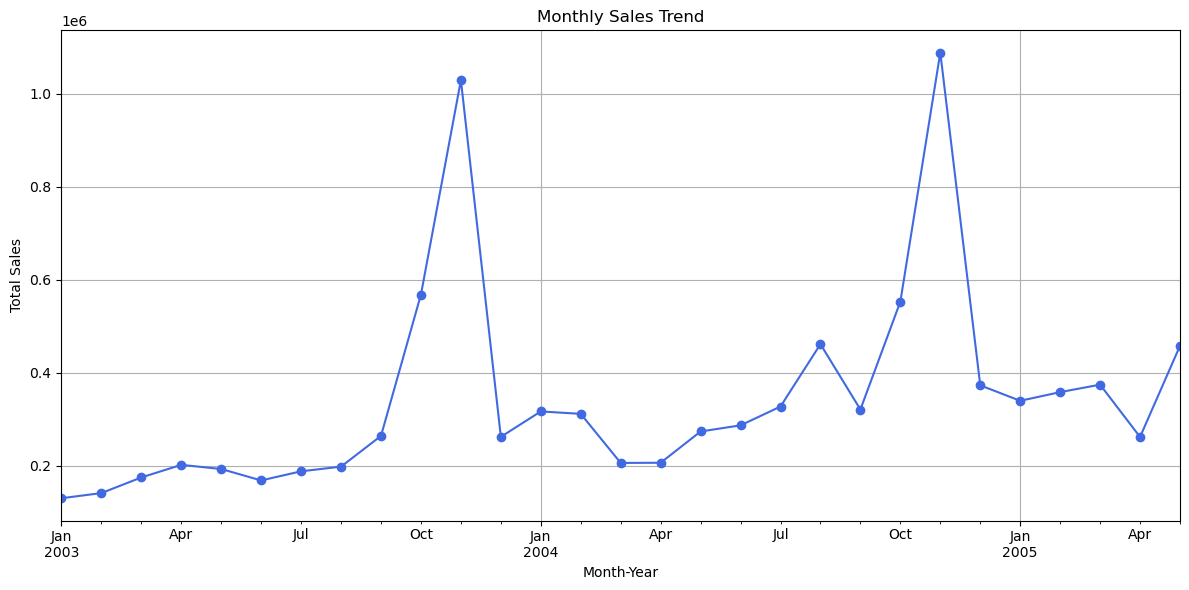

In [4]:

# Group sales by month and year
df['MonthYear'] = df['ORDERDATE'].dt.to_period('M')
monthly_sales = df.groupby('MonthYear')['SALES'].sum().sort_index()

# Plot
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='royalblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight:** This chart reveals seasonal trends or any significant fluctuations in sales across different months.

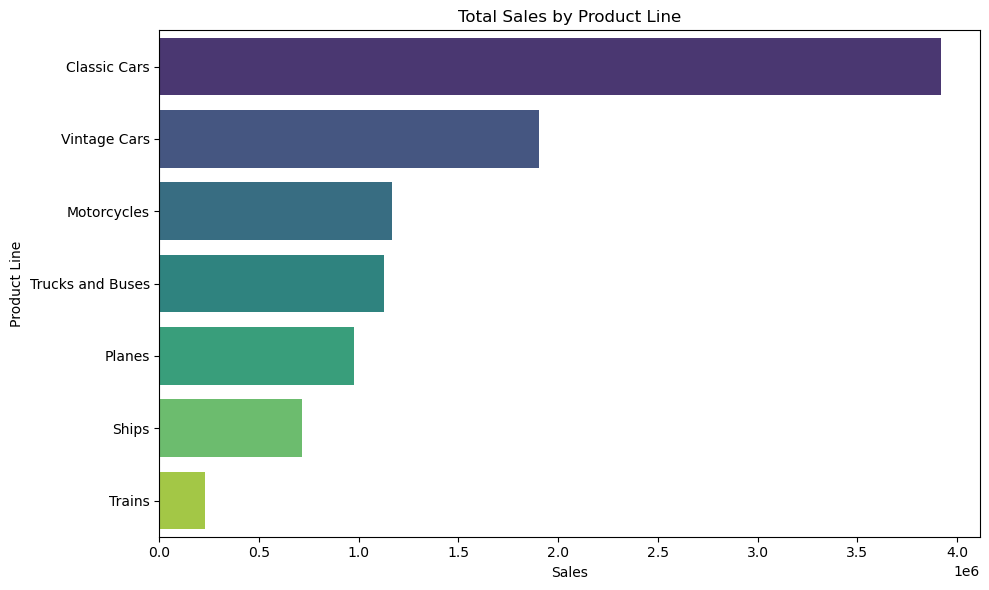

In [5]:

# Total sales by product line
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
plt.title('Total Sales by Product Line')
plt.xlabel('Sales')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()


**Insight:** Identify which product lines are the highest revenue drivers.

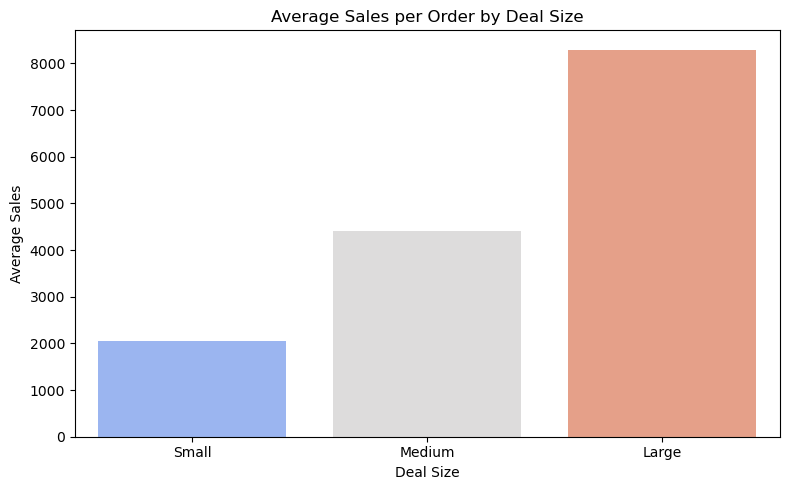

In [6]:

# Average sales per order by deal size
deal_sales = df.groupby('DEALSIZE')['SALES'].mean().sort_values()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=deal_sales.index, y=deal_sales.values, palette='coolwarm')
plt.title('Average Sales per Order by Deal Size')
plt.ylabel('Average Sales')
plt.xlabel('Deal Size')
plt.tight_layout()
plt.show()


**Insight:** Shows the impact of different deal sizes on revenue per order.


## Summary of Business Insights

- **Monthly Trends:** Helps in understanding seasonal patterns and planning marketing campaigns.
- **Top Performing Products:** Allows focus on best-selling product lines for inventory and promotions.
- **Deal Size Effect:** Informs sales strategies based on deal sizes that yield higher average sales.

This analysis can be further enhanced with customer segmentation or regional performance insights.
